In [1]:
print(__doc__)

# Author: Adam Kleczewski
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata

# Load a multi-label dataset
#yeast = fetch_mldata('yeast')

Automatically created module for IPython interactive environment


In [3]:
import pandas as pd
dataset = pd.read_csv('UNdataset.csv')

In [4]:
dataset

No.                                 Sentence(Original)           country  \
0      1  Appoint a Cyber Ambassador Australia has a coo...    Australia_2016   
1      2  The skills of university graduates and technic...    Australia_2016   
2      3    Department of Information Security and Commu...       Brazil_2010   
3      4  Department of Information Security and Communi...       Brazil_2010   
4      5  Department of  Reference guide for the securit...       Brazil_2010   
5      6  REGULATION ON RISK MANAGEMENT OF TELECOMMUNICA...       Brazil_2012   
6      7  The purpose of this Regulation is to establish...       Brazil_2012   
7      8  To meet the objective of the caput, this Regul...       Brazil_2012   
8      9    The General Information Technology Strategy ...  Brazil_2013-2015   
9     10  The document is an effective tool for communic...  Brazil_2013-2015   
10    11  Still on the ICT theme, it is oriented the org...  Brazil_2013-2015   
11    12  promote the integration and articulation betwe...  Brazil_2013-2015   
12    13  stimulate development, standardization, integr...  Brazil_2013-2015   
13    14  as Related Agencies, represented by their hold...  Brazil_2013-2015   
14    15  guide and manage the processes of strategic pl...  Brazil_2013-2015   
15    16  define, elaborate, disseminate and implement, ...  Brazil_2013-2015   
16    17  promote the dissemination of available policie...  Brazil_2013-2015   
17    18  to promote the exchange of knowledge among its...  Brazil_2013-2015   
18    19  to monitor and evaluate the results of the reg...  Brazil_2013-2015   
19    20  provide subsidies to the Central Organ of the ...  Brazil_2013-2015   
20    21  enforce and enforce, through policies, guideli...  Brazil_2013-2015   
21    22  enforce and enforce, through policies, guideli...  Brazil_2013-2015   
22    23  to subsidize the information technology unit o...  Brazil_2013-2015   
23    24  Likewise, this policy is enhanced and suppleme...             Chile   
24    25  With that in mind, this policy includes a spec...             Chile   
25    26  There is an especially relevant group, within ...             Chile   
26    27  In Chile, while consideration of a specific po...             Chile   
27    28  Likewise, the need is also in place to evaluat...             Chile   
28    29  For such purpose, the National CSIRT will keep...             Chile   
29    30    Since the founding of the People’s Republic ...             China   
..   ...                                                ...               ...   
661  662  "The threats to the national information indus...       Russia_2000   
662  663  "The resultant state of affairs in the area of...       Russia_2000   
663  664  "The most important areas of this activity are...       Russia_2000   
664  665  "This also concerns the federal executive  bod...       Russia_2000   
665  666  "In the field of science and technology C The ...       Russia_2000   
666  667  "Toward this end the state must  promote the c...       Russia_2000   
667  668  "The principal measures for ensuring the infor...       Russia_2000   
668  669  "In the national information and telecommunica...       Russia_2000   
669  670  "The internal threats representing the greates...       Russia_2000   
670  671  "In the law enforcement and judicial spheres C...       Russia_2000   
671  672  "Internal threats representing the greatest da...       Russia_2000   
672  673  "In respect of these conditions, the specific ...       Russia_2000   
673  674  "Such cooperation must help enhance the  infor...       Russia_2000   
674  675  "The Mission of the NISS is to produce the fol...       SaudiArabia   
675  676  "E-commerce achieves: \uf0b7 Easier shopping a...            Serbia   
676  677  "Each exercise will be followed by a detailed ...          Slovenia   
677  678  "The Strategy goes on to set up six specific  ...             Spain   
678  679  "The purpose of the Nation

In [31]:
X = dataset.iloc[:,4:69]
Y = dataset.iloc[:,69:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3,
                                                    random_state=0)

In [32]:
Y

CRIMINAL LEGISLATION  REGULATION AND COMPLIANCE  CIRT  STANDARDS  \
0                       0                          0     0          0   
1                       0                          0     0          0   
2                       0                          0     0          0   
3                       0                          0     0          0   
4                       0                          0     0          0   
5                       0                          1     0          0   
6                       0                          1     0          0   
7                       0                          1     0          0   
8                       0                          1     0          0   
9                       0                          0     0          0   
10                      0                          0     0          0   
11                      0                          0     0          1   
12                      0                          0     0          1   
13                      0                          0     0          0   
14                      0                          0     0          1   
15                      0                          0     0          1   
16                      0                          0     0          1   
17                      0                          0     0          1   
18                      0                          1     0          0   
19                      0                          0     0          1   
20                      0                          0     0          1   
21                      0                          0     0          1   
22                      0                          1     0          1   
23                      0                          1     0          0   
24                      0                          0     0          0   
25                      0                          0     0          0   
26                      0                          0     0          1   
27                      0                          0     0          1   
28                      0                          0     0          0   
29                      0                          0     0          0   
..                    ...                        ...   ...        ...   
661                     0                          0     0          0   
662                     0                          0     0          0   
663                     1                          1     0          1   
664                     0                          0     0          1   
665                     0                          0     0          0   
666                     0                          0     0          0   
667                     0                          0     0          0   
668                     0                          1     0          0   
669                     0                          1     0          0   
670                     0                          0     0          0   
671                     0                          1     0          0   
672                     0                          0     0          0   
673                     0                          0     0          0   
674                     0                          1     0          1   
675                     0                          0     0          0   
676                     0                          1     0          0   
677                     0                          0     0          0   
678                     0                          0     0          0   
679                     0                          0     0          0   
680                     0                          0     0          1   
681                     0                          0     0          0   
682                     1                          0     0          1   
683                     0                          0     0     

In [33]:
X

internet  dod  russian  cybersecur  sisp  inform  educ  feder  polici  \
0           0    0        0           0     0       0     0      0       0   
1           0    0        0           0     0       0     0      0       0   
2           0    0        0           0     0       1     0      0       0   
3           0    0        0           0     0       1     0      0       0   
4           0    0        0           0     0       1     0      0       0   
5           0    0        0           0     0       0     0      0       0   
6           0    0        0           0     0       0     0      0       0   
7           0    0        0           0     0       1     0      0       0   
8           0    0        0           0     1       1     0      0       0   
9           0    0        0           0     1       1     0      0       0   
10          0    0        0           0     1       1     0      0       1   
11          0    0        0           0     0       0     0      0       1   
12          0    0        0           0     0       1     0      0       0   
13          0    0        0           0     1       1     0      0       0   
14          0    0        0           0     1       1     0      0       0   
15          0    0        0           0     1       0     0      0       1   
16          0    0        0           0     1       1     0      0       1   
17          0    0        0           0     1       0     0      0       1   
18          0    0        0           0     1       0     0      0       0   
19          0    0        0           0     1       0     0      0       1   
20          0    0        0           0     1       0     0      0       1   
21          0    0        0           0     1       0     0      0       1   
22          0    0        0           0     1       1     0      0       1   
23          1    0        0           0     0       1     0      0       1   
24          1    0        0           1     0       0     0      0       1   
25          0    0        0           0     0       1     0      0       0   
26          0    0        0           1     0       1     0      0       1   
27          0    0        0           1     0       0     0      0       0   
28          0    0        0           1     0       1     0      0       0   
29          0    0        0           0     0       0     0      0       1   
..        ...  ...      ...         ...   ...     ...   ...    ...     ...   
661         0    0        1           0     0       1     0      1       0   
662         0    0        1           0     0       1     0      1       1   
663         0    0        1           0     0       1     0      1       0   
664         0    0        1           0     0       1     0      1       0   
665         0    0        1           0     0       1     0      0       1   
666         0    0        1           0     0       1     0      1       0   
667         0    0        1           0     0       1     1      1       0   
668         0    0        1           0     0       1     0      1       0   
669         0    0        1           0     0       1     0      0       0   
670         0    0        1           0     0       1     1      1       0   
671         0    0        0           0     0       1     0      0       0   
672         0    0        1           0     0       1     0      1       0   
673         0    0        1           0     0       1     0      1       0   
674         0    0        0           0     0       1     0      0       1   
675         0    0        0           0     0       1     1      0       0   
676         0    0        0           0     0       0     0      0       0   
677         0    0        0           0     0       1     0      0       1   
678         0    0        0           0     0       0     0      0       0   
679         0    0        0           0     0       1     0      0       0   
680         0    0        0

In [42]:
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X, Y)
Y_pred_ovr = ovr.predict(X)
ovr_jaccard_score = jaccard_similarity_score(Y, Y_pred_ovr)

In [43]:
ovr_jaccard_score

0.33257011921990209

In [44]:
ovr.score(X,Y)

0.26193921852387841

In [45]:
chains = [ClassifierChain(LogisticRegression(), order='random', random_state=i)
          for i in range(10)]

In [46]:
for chain in chains:
    chain.fit(X, Y)

In [47]:
Y_pred_chains = np.array([chain.predict(X) for chain in
                          chains])

In [48]:
Y_pred_chains

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [49]:
chain_jaccard_scores = [jaccard_similarity_score(Y, Y_pred_chain >= .5)
                        for Y_pred_chain in Y_pred_chains]

In [50]:
chain_jaccard_scores

[0.37661209991166572,
 0.38176101515464755,
 0.4002946040934463,
 0.38961195582034935,
 0.4079377086974772,
 0.38729991667763014,
 0.412618640404458,
 0.38281366486865759,
 0.38956027089167466,
 0.39947171738054515]

In [51]:
Y_pred_ensemble = Y_pred_chains.mean(axis=0)

In [52]:
Y_pred_ensemble

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
ensemble_jaccard_score = jaccard_similarity_score(Y,
                                                  Y_pred_ensemble >= .5)

In [54]:
ensemble_jaccard_score

0.38399208124244294

In [55]:
model_scores = [ovr_jaccard_score] + chain_jaccard_scores

In [56]:
model_scores.append(ensemble_jaccard_score)

In [57]:
model_scores

[0.33257011921990209,
 0.37661209991166572,
 0.38176101515464755,
 0.4002946040934463,
 0.38961195582034935,
 0.4079377086974772,
 0.38729991667763014,
 0.412618640404458,
 0.38281366486865759,
 0.38956027089167466,
 0.39947171738054515,
 0.38399208124244294]

In [58]:
model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

In [59]:
x_pos = np.arange(len(model_names))

In [60]:
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

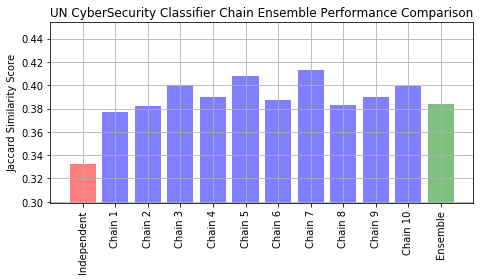

In [61]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('UN CyberSecurity Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

In [62]:
Y_pred_chains_prob = np.array([chain.predict_proba(X) for chain in
                          chains])

In [63]:
Y_pred_chains_prob

array([[[  2.34462285e-01,   7.01908208e-02,   9.28442899e-03, ...,
           6.18876763e-03,   7.95919286e-03,   6.20894197e-03],
        [  7.60291346e-02,   8.07643384e-02,   3.21896589e-02, ...,
           1.95595696e-02,   7.01019191e-02,   2.72600654e-02],
        [  1.68280803e-02,   1.87369582e-01,   1.21218749e-02, ...,
           4.58292152e-03,   4.76639180e-03,   4.73304764e-03],
        ..., 
        [  8.40435172e-03,   7.51544962e-03,   8.04073312e-03, ...,
           1.49835976e-03,   1.71655184e-03,   1.57454003e-03],
        [  1.15982074e-03,   8.97866108e-03,   9.21277537e-04, ...,
           6.11086068e-04,   5.92960677e-04,   3.38709829e-04],
        [  1.37485568e-02,   1.83560225e-02,   4.74723131e-03, ...,
           2.49233363e-03,   7.39277010e-03,   3.21746964e-03]],

       [[  1.26690517e-01,   1.56159019e-01,   1.20548410e-02, ...,
           8.64160256e-03,   7.16978815e-03,   6.41057315e-03],
        [  7.83395981e-02,   1.27905994e-01,   3.59208684e-0

In [64]:
CORPUS = pd.read_csv('unlabel.csv')['sent']

In [65]:
import nltk 
from nltk.corpus import stopwords
from nltk import FreqDist

In [66]:
cleanedCORPUS=[]
for i in CORPUS:
    tokens = nltk.word_tokenize(i)
    mystopwords = stopwords.words('english')
    words = [w.lower() for w in tokens if w.isalpha() if w.lower()not in mystopwords]
    porter = nltk.PorterStemmer()
    stem1 = [porter.stem(w) for w in words]
    cleanedCORPUS.append(stem1)

In [67]:
cleanedCORPUS

[['presid', 'republ'],
 ['ground', 'floor', 'wing', 'live', 'room', 'brazil'],
 ['presid', 'republ'],
 ['offic', 'institut', 'secur'],
 ['print',
  'queri',
  'text',
  'without',
  'format',
  'click',
  'print',
  'bottom',
  'page'],
 ['accord', 'art'],
 ['central',
  'organ',
  'sisp',
  'togeth',
  'sector',
  'section',
  'bodi',
  'sisp',
  'develop',
  'gener',
  'strategi',
  'inform',
  'technolog',
  'egti',
  'direct',
  'autarch',
  'foundat',
  'administr',
  'feder',
  'execut',
  'branch',
  'revis',
  'publish',
  'annual',
  'serv',
  'elabor',
  'pdti',
  'bodi',
  'entiti',
  'part',
  'sisp'],
 ['brazil',
  'plan',
  'pluriannu',
  'plan',
  'ppa',
  'quadrennium',
  'strategi',
  'construct',
  'version',
  'egti',
  'valu',
  'transvers',
  'egti',
  'set',
  'nine',
  'strateg',
  'object',
  'five',
  'perspect',
  'societi',
  'feder',
  'govern',
  'intern',
  'process',
  'peopl',
  'learn',
  'growth',
  'financi'],
 ['defin',
  'object',
  'strateg',
  'or

In [68]:
stemsentence=[]
for i in cleanedCORPUS:
    persen = [' '.join(i)]
    stemsentence.append(persen)

In [69]:
stemsentence=pd.DataFrame(stemsentence)

In [70]:
stemsentence

0
0                                         presid republ
1                    ground floor wing live room brazil
2                                         presid republ
3                                  offic institut secur
4     print queri text without format click print bo...
5                                            accord art
6     central organ sisp togeth sector section bodi ...
7     brazil plan pluriannu plan ppa quadrennium str...
8     defin object strateg orient reach indic respec...
9     addit consolid rich process collabor construct...
10    octob coordin organ oper control supervis tech...
11    assur feder govern adequ dynam reliabl effect ...
12    make easier interest parti obtain inform avail...
13    stimul ration use inform technolog resourc wit...
14    propos institut adapt necessari improv manag m...
15          stimul promot train develop train work area
16                                     inform technolog
17    defin strateg polici inform technolog manag ex...
18                                           date octob
19    central organ secretariat logist inform techno...
20    sector bodi repres holder resourc ministri org...
21                  coordin committe made repres sector
22    section bodi repres holder inform technolog re...
23                           respons central organ sisp
24                                     inform technolog
25                   promot develop train develop train
26      encourag action order follow technic innov area
27                    incumb upon sisp coordin committe
28    particip elabor implement polici guidelin gene...
29             advis central organ sisp fulfil attribut
...                                                 ...
4212            state actor seek acquir destruct malwar
4213  uncontrol spread destruct malwar hostil actor ...
4214  addit intern regim govern rang domest export c...
4215   work capabl intern partner plan train cyber oper
4216  throughout cours strategi dod strengthen inter...
4217          photo petti offic class david brandenburg
4218  connect made stakehold growth centr deliv mult...
4219  make unremit effort build larg workforc compat...
4220  achiev technolog breakthrough energi develop e...
4221  also encourag develop transform technolog coal...
4222  prioriti shall place studi law miner format me...
4223  strengthen research respons strategi implement...
4224  germplasm develop preserv innov target cultiv ...
4225  increasingli inform nation economi modern serv...
4226  enabl inform technolog larg applic softwar mod...
4227  major public emerg prevent quick respons prior...
4228  main research direct strongli correl system so...
4229  biolog foundat human health diseas prioriti se...
4230  scientif basi manufactur extrem environment co...
4231  determin compet entiti respons secur creat imp...
4232  scientif output across variou area knowledg de...
4233  sourc threat inform secur russian feder subdiv...
4234  among intern threat russian inform secur forei...
4235  cybersecur understood therefor narrow concept ...
4236  project aim provid necessari support enabl imp...
4237  follow issu must address spirit cooper establi...
4238  goal strategi improv internet secur sweden sec...
4239  gortt establish trinidad tobago comput secur i...
4240  iii critic infrastructur mean comput system de...
4241  respons includ develop comprehens nation plan ...

[4242 rows x 1 columns]

In [71]:
stemsentence.to_csv("unlabelstem.csv",index=True,sep=',')

In [72]:
unlabeldataset = pd.read_csv('unlabeldataset.csv')

In [73]:
unlabeldataset

sent(original)  \
0                    2010 - Presidency of the Republic.   
1       Ground Floor, Wing A - Living Room 107  Brazil.   
2                           Presidency of the Republic.   
3                     Office of Institutional Security.   
4       To print the query text without formatting, ...   
5                            3o In accordance with art.   
6     7,579, of 2011, the Central Organ of  SISP wil...   
7     The Brazil 2022 Plan and the Pluriannual Plan ...   
8     After defining these objectives and the strate...   
9     In addition, it consolidates a rich process of...   
10    7579, of October 11, 2011, the  coordination, ...   
11    assure the Federal Government adequate, dynami...   
12    to make it easier for interested parties to ob...   
13    stimulate the rational use of information tech...   
14    propose institutional adaptations necessary to...   
15    stimulate and promote the training, developmen...   
16                      ?information technology; and  ?   
17    define the strategic policy of information tec...   
18                    7,579, dated October 11, 2011,  ?   
19    as the Central Organ, the Secretariat of Logis...   
20    as Sectoral Bodies, represented by their holde...   
21    The Coordination Committee, made up of the rep...   
22    as Sectional Bodies, represented by their hold...   
23    7.579,  It is the responsibility of the Centra...   
24                          ?information technology;  ?   
25    promote the development of training, developme...   
26    to encourage forward-looking actions, in order...   
27    It is incumbent upon the SISP Coordination Com...   
28    participate in the elaboration and implementat...   
29    advise the Central Organ of SISP in the fulfil...   
...                                                 ...   
4212  State and non-state  actors seek to acquire de...   
4213  The uncontrolled spread of destructive malware...   
4214  In addition to international regimes  and best...   
4215  Work with capable international partners to pl...   
4216  Throughout the course of this strategy, DoD wi...   
4217  (Photo by Petty Officer 2nd  Class David A. Br...   
4218  "Connections made between stakeholders, throug...   
4219  "We should make unremitting efforts to build a...   
4220  "; 3) achieving technological breakthroughs in...   
4221  "It is also encouraged to develop transformati...   
4222  "Priorities shall be placed on studying the la...   
4223  "Strengthen research on response strategies in...   
4224  "(17) Germplasm development, preservation, and...   
4225  "The increasingly information technology-based...   
4226  "(40) Enabling information technology and larg...   
4227  "(60) Major public emergency prevention and qu...   
4228  "Main research directions: strongly correlated...   
4229  "(1) Biological foundations of human health an...   
4230  "(8) Scientific basis of manufacturing under e...   
4231  "4) Determining the competence of entities res...   
4232  "Scientific output across various areas of  kn...   
4233  "The sources of threats to the information sec...   
4234  "Among internal threats to Russian information...   
4235  "Cybersecurity  is understood, therefore, as a...   
4236  "This  project aims at providing the necessary...   
4237  "The following issues must be addressed with t...   
4238  "The goal of a strategy to improve Internet se...   
4239  "The GoRTT will establish a Trinidad and Tobag...   
4240  "(iii) Critical Infrastructure: means computer...   
4241  "These responsibilities include:  ? Developing...   

                                             sent(stem)           country  \
0                                         presid republ       Brazil_2010   
1                    ground floor wing live room brazil       Brazil_2010   
2                                         presid republ       Brazil_2010   
3                                  offic institut secur       Brazil_2010 

In [74]:
Xnew = unlabeldataset.iloc[:,3:]

In [86]:
Y_pred_chains_prob_new = np.array([chain.predict_proba(Xnew) for chain in
                          chains])

In [87]:
Y_pred_chains_prob_new

array([[[  2.87337626e-02,   1.10720023e-01,   2.11466329e-02, ...,
           1.51561807e-02,   1.67694424e-02,   2.33822423e-02],
        [  4.41242116e-02,   1.77887371e-01,   2.69308910e-02, ...,
           1.82582051e-02,   2.10597407e-02,   2.96051275e-02],
        [  2.87337626e-02,   1.10720023e-01,   2.11466329e-02, ...,
           1.51561807e-02,   1.67694424e-02,   2.33822423e-02],
        ..., 
        [  1.00880247e-02,   1.42800243e-01,   1.20656901e-02, ...,
           1.50816091e-02,   1.36194729e-02,   1.73022338e-02],
        [  3.10050503e-03,   2.22481647e-01,   1.79076070e-03, ...,
           1.72620505e-03,   1.89320920e-03,   1.57504349e-02],
        [  1.81469975e-03,   1.07633773e-02,   1.19925996e-03, ...,
           8.48681551e-04,   5.87842233e-04,   8.97077755e-04]],

       [[  3.68553748e-02,   2.51493526e-01,   2.50777684e-02, ...,
           1.79412008e-02,   2.54227896e-02,   4.40195314e-02],
        [  4.89683703e-02,   2.55878789e-01,   2.97595523e-0

In [88]:
Y_pred_ensemble_new_proba = Y_pred_chains_prob_new.mean(axis=0)

In [89]:
Y_pred_ensemble_new_proba

array([[ 0.02107917,  0.11234728,  0.02054628, ...,  0.01502128,
         0.0159293 ,  0.02298596],
       [ 0.03861949,  0.21869474,  0.02782372, ...,  0.01811732,
         0.02328652,  0.03816469],
       [ 0.02107917,  0.11234728,  0.02054628, ...,  0.01502128,
         0.0159293 ,  0.02298596],
       ..., 
       [ 0.01202742,  0.28496961,  0.01348178, ...,  0.01784383,
         0.0195463 ,  0.0166437 ],
       [ 0.00261329,  0.17892255,  0.00168519, ...,  0.00177856,
         0.00209799,  0.01490469],
       [ 0.00287921,  0.02371041,  0.00105706, ...,  0.00120141,
         0.00088349,  0.00133708]])

In [90]:
Y_pred_ensemble_new_proba=pd.DataFrame(Y_pred_ensemble_new_proba)

In [91]:
Y_pred_ensemble_new_proba

0         1         2         3         4         5         6   \
0     0.021079  0.112347  0.020546  0.143059  0.021919  0.010254  0.018225   
1     0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
2     0.021079  0.112347  0.020546  0.143059  0.021919  0.010254  0.018225   
3     0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
4     0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
5     0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
6     0.039912  0.236572  0.015881  0.450056  0.025215  0.002376  0.045998   
7     0.089322  0.176106  0.005400  0.218855  0.037133  0.074884  0.014947   
8     0.052344  0.311371  0.012002  0.629222  0.023136  0.001625  0.115186   
9     0.074868  0.163741  0.020739  0.491869  0.026572  0.004321  0.062587   
10    0.051548  0.208043  0.014049  0.292144  0.051584  0.008006  0.012606   
11    0.045721  0.256359  0.017488  0.247841  0.031762  0.005437  0.014153   
12    0.020209  0.308838  0.021348  0.259953  0.018206  0.005529  0.019149   
13    0.020635  0.132235  0.016589  0.334261  0.063545  0.006490  0.013580   
14    0.020173  0.249923  0.019236  0.370934  0.007923  0.007794  0.041533   
15    0.129478  0.173616  0.037850  0.394816  0.043156  0.010460  0.033492   
16    0.020209  0.308838  0.021348  0.259953  0.018206  0.005529  0.019149   
17    0.006677  0.556925  0.007556  0.440940  0.005800  0.116401  0.031031   
18    0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
19    0.020209  0.308838  0.021348  0.259953  0.018206  0.005529  0.019149   
20    0.021079  0.112347  0.020546  0.143059  0.021919  0.010254  0.018225   
21    0.036718  0.259587  0.025852  0.311037  0.018082  0.009071  0.023003   
22    0.016621  0.346495  0.018929  0.244997  0.011816  0.007557  0.033892   
23    0.031610  0.200855  0.025290  0.514327  0.014355  0.004399  0.083289   
24    0.020209  0.308838  0.021348  0.259953  0.018206  0.005529  0.019149   
25    0.129478  0.173616  0.037850  0.394816  0.043156  0.010460  0.033492   
26    0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
27    0.027987  0.191831  0.020096  0.535970  0.012166  0.003126  0.067246   
28    0.005747  0.113454  0.004856  0.898039  0.012754  0.069418  0.049663   
29    0.031610  0.200855  0.025290  0.514327  0.014355  0.004399  0.083289   
...        ...       ...       ...       ...       ...       ...       ...   
4212  0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
4213  0.037448  0.149914  0.013426  0.555566  0.018442  0.011903  0.011219   
4214  0.039243  0.265257  0.021574  0.500058  0.013980  0.011384  0.015002   
4215  0.022202  0.093398  0.011046  0.230540  0.026051  0.039997  0.027827   
4216  0.004417  0.008599  0.006610  0.032814  0.007142  0.010768  0.005662   
4217  0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
4218  0.020521  0.070571  0.003719  0.869839  0.037773  0.049304  0.009177   
4219  0.059859  0.179913  0.004426  0.150076  0.153913  0.004507  0.003122   
4220  0.021957  0.275460  0.020813  0.075506  0.202546  0.010980  0.003757   
4221  0.038619  0.218695  0.027824  0.293512  0.019182  0.010037  0.026329   
4222  0.051328  0.350986  0.035308  0.394302  0.046793  0.008394  0.026827   
4223  0.014057  0.036716  0.003909  0.071296  0.223880  0.022435  0.007855   
4224  0.013301  0.026028  0.006947  0.222395  0.185441  0.033555  0.025046   
4225  0.136181  0.089106  0.011744  0.692296  0.281820  0.005507  0.002527   
4226  0.003310  0.098625  0.001421  0.815784  0.013195  0.019008  0.002000   
4227  0.025266  0.221813  0.011091  0.209443  0.031294  0.018057  0.028400   
4228  0.011306  0.138955  0.013928  0.160197  0.020789  0.011814  0.009316   
4229  0.029170  0.358634  0.018157  0.471155  0.033918  0.011024  0.018358   
4230  0.015411  0.578917  0.007838  0.206555  0.027271  0.010565  0.007971   
4231  0.004797  0.367453  0.002773

In [92]:
Y_pred_ensemble_new_proba.to_csv("UNproba.csv",index=True,sep=',')

In [145]:
needlabel=[]
k=0
for i in range(21):

    a= Y_pred_ensemble_new_proba[i].quantile(0.99)
    
    for j in Y_pred_ensemble_new_proba[i]:
        if j > a:
            k+=1
            perneedlabel=(i,j)
            needlabel.append(perneedlabel)
print(k)

828


In [144]:
len(needlabel)

828

In [146]:
needlabel=pd.DataFrame(needlabel)

In [147]:
needlabel.to_csv("needlabel.csv",index=True,sep=',')